In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# reading the data
train_df = pd.read_csv("../data/train.csv")
test_df  = pd.read_csv("../data/test.csv")

In [45]:
train_df.shape

(2000, 21)

In [46]:
train_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [47]:
# since the dataset has a few missing values, removing them entirley shouldn't hurt the performance 
# removing them for simplicity
# we could impute the values later using appropriate strategies if the performance is not satisfactory
train_df = train_df.dropna()

In [48]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1991 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1991 non-null   int64  
 1   blue           1991 non-null   int64  
 2   clock_speed    1991 non-null   float64
 3   dual_sim       1991 non-null   int64  
 4   fc             1991 non-null   float64
 5   four_g         1991 non-null   float64
 6   int_memory     1991 non-null   float64
 7   m_dep          1991 non-null   float64
 8   mobile_wt      1991 non-null   float64
 9   n_cores        1991 non-null   float64
 10  pc             1991 non-null   float64
 11  px_height      1991 non-null   float64
 12  px_width       1991 non-null   float64
 13  ram            1991 non-null   float64
 14  sc_h           1991 non-null   float64
 15  sc_w           1991 non-null   float64
 16  talk_time      1991 non-null   int64  
 17  three_g        1991 non-null   int64  
 18  touch_screen 

In [50]:
discrete_features = ["blue","wifi","three_g","touch_screen","four_g","dual_sim"]
continuous_features = [col for col in train_df.columns if col not in discrete_features] 

In [51]:
# notice that the dataset doesn't have many missing values which is nice
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1991 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1991 non-null   int64  
 1   blue           1991 non-null   int64  
 2   clock_speed    1991 non-null   float64
 3   dual_sim       1991 non-null   int64  
 4   fc             1991 non-null   float64
 5   four_g         1991 non-null   float64
 6   int_memory     1991 non-null   float64
 7   m_dep          1991 non-null   float64
 8   mobile_wt      1991 non-null   float64
 9   n_cores        1991 non-null   float64
 10  pc             1991 non-null   float64
 11  px_height      1991 non-null   float64
 12  px_width       1991 non-null   float64
 13  ram            1991 non-null   float64
 14  sc_h           1991 non-null   float64
 15  sc_w           1991 non-null   float64
 16  talk_time      1991 non-null   int64  
 17  three_g        1991 non-null   int64  
 18  touch_screen 

In [52]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [53]:
# the discreate features in the dataset have very small range
# no need for float dtype
train_df[discrete_features] = train_df[discrete_features].astype("object")

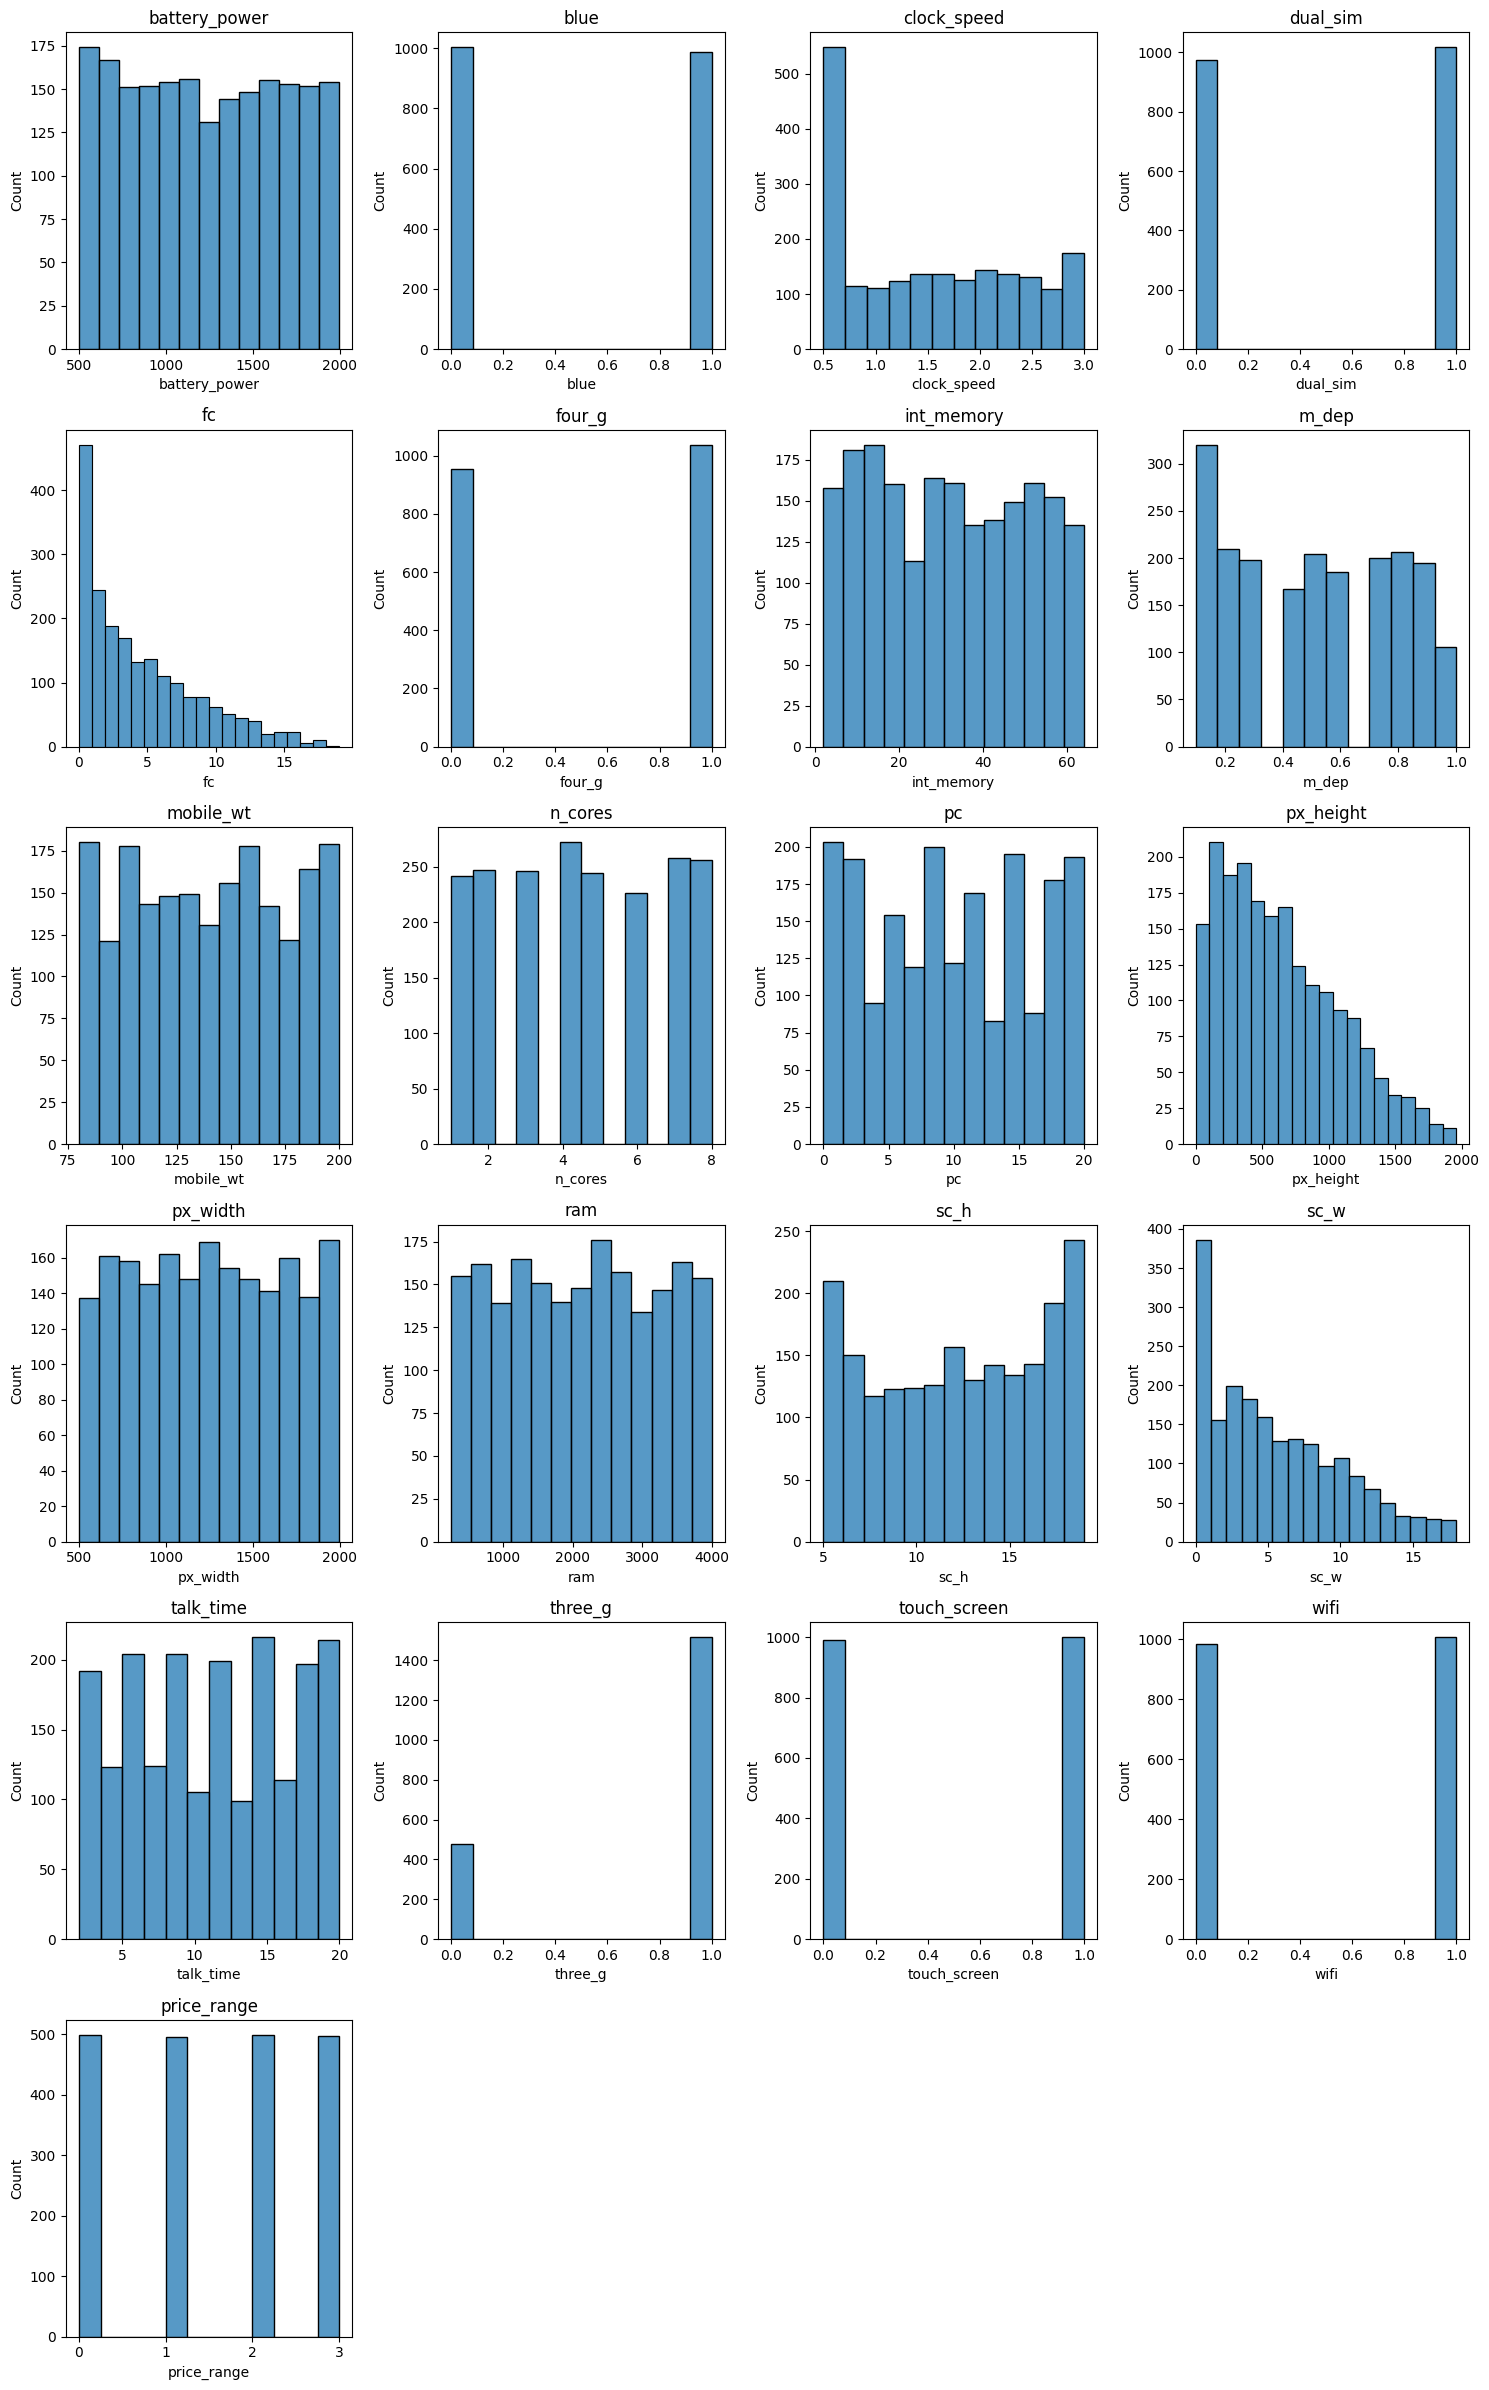

In [54]:
import math
import seaborn as sns

def grid_plot(dataframe, cols, plot_fn, C=2, figsize=15, *args, **kwargs):
    
    num_plots = len(cols)
    rows = math.ceil(num_plots / C)
    fig, axes = plt.subplots(nrows=rows, ncols=C, figsize=(figsize, C * rows))

    for i, col in enumerate(cols):
        ax = axes[i // C, i % C]
        plot_fn(dataframe[col], ax=ax, *args, **kwargs)
        ax.set_title(col)

    for i in range(num_plots, rows * C):
        ax = axes[i // C, i % C]
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# we notice that the target variable (and most of the features) are very well-balanced
# a linear model should be able to fit this data well
grid_plot(train_df,train_df.columns,sns.histplot,C=4)

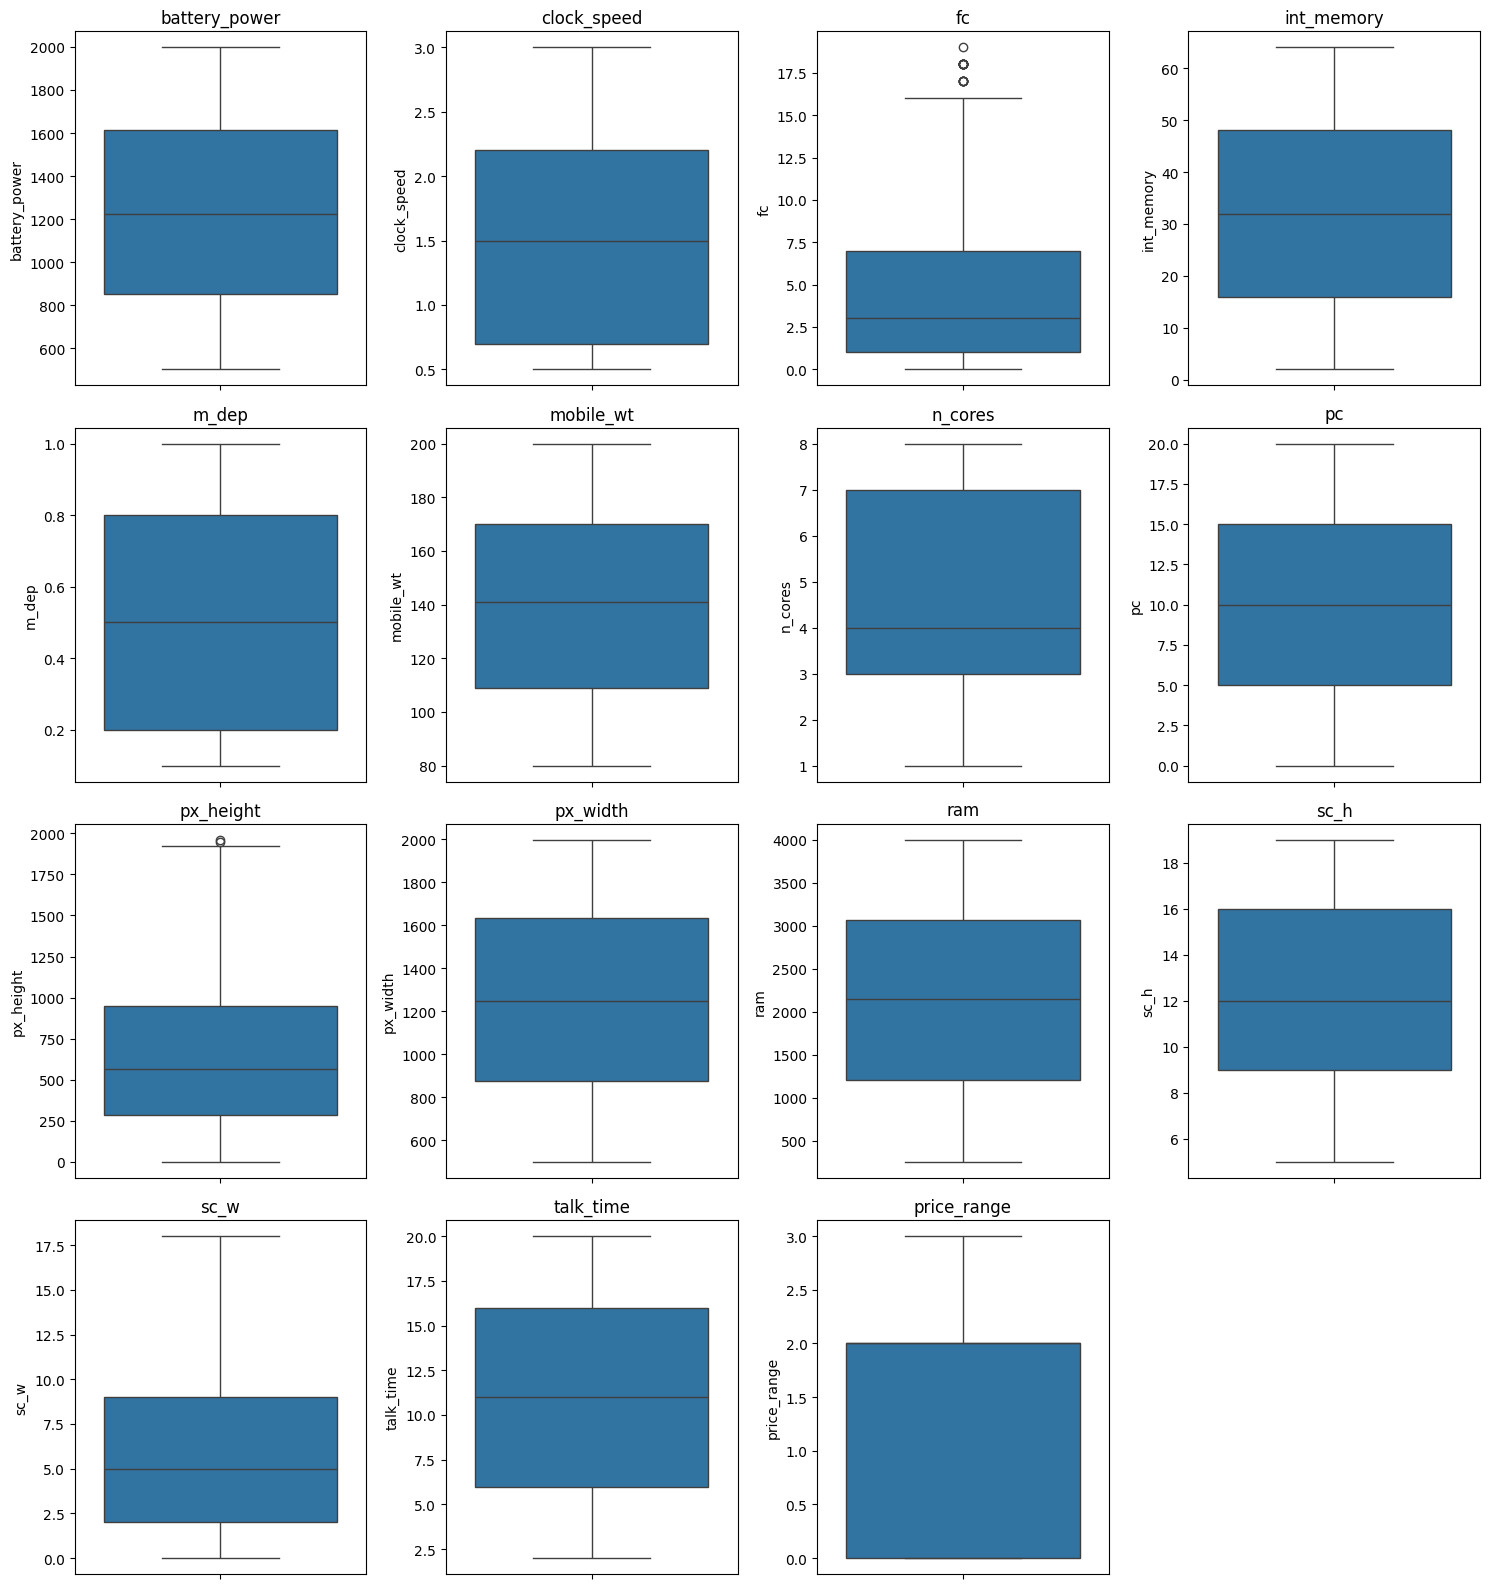

In [55]:
grid_plot(train_df,continuous_features,sns.boxplot,C=4)

<Axes: >

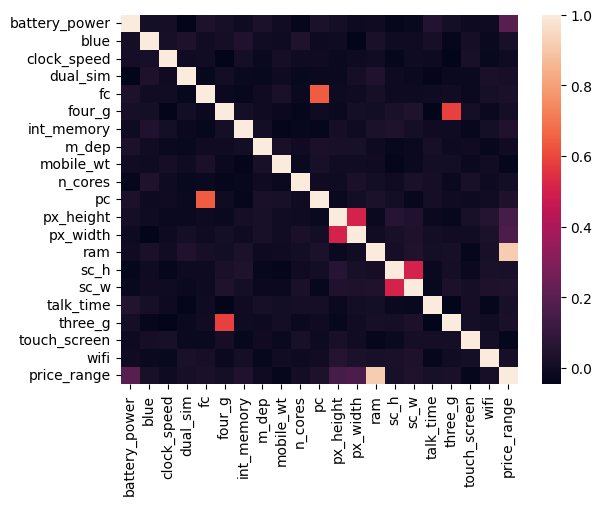

In [56]:
sns.heatmap(train_df.corr())

In [57]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from collections import defaultdict


# benchmark the performance of 3 different models using kfold cross-validation
# the 3 models were chosen to represent different classes of algorithms i.e Non-parameteric, linear models and ensemble models respecitvely
# for our initial run we will use the defeault hyperparameters of each algorithm as reported in the sklearn docs
RS = 42
continuous_features.remove("price_range")
preprocessor = ColumnTransformer(
    transformers=[
        ('continuous', StandardScaler(), continuous_features),
        ('categorical', OneHotEncoder(handle_unknown='ignore'), discrete_features)
    ])


models = [
    ('K-Nearest Neighbor', Pipeline([
        ('preprocessor', preprocessor),
        ('knn', KNeighborsClassifier())
    ])),
    ('Logistic Regression', Pipeline([
        ('preprocessor', preprocessor),
        ('lr', LogisticRegression(random_state=RS))
    ])),
    ('Random Forest', RandomForestClassifier(random_state=RS))
]

metrics = ('accuracy','f1_macro')
y = train_df["price_range"]
X = train_df.drop("price_range",axis=1)
train_metrics = defaultdict(lambda : defaultdict(list))
val_metrics = defaultdict(lambda : defaultdict(list))

for model_name,model in models:
    cv_results = cross_validate(model,X,y,cv = 5, scoring=metrics,return_train_score=True)
    for metric in metrics:
        train_metrics_mean = np.mean(cv_results[f"train_{metric}"])
        train_metrics_std = np.std(cv_results[f"train_{metric}"])
        train_metrics[model_name][metric] = (train_metrics_mean,train_metrics_std)

        val_metrics_mean = np.mean(cv_results[f"test_{metric}"])
        val_metrics_std = np.std(cv_results[f"test_{metric}"])
        val_metrics[model_name][metric] = (val_metrics_mean,val_metrics_std)


In [58]:
import pprint
pprint.pp(train_metrics)

defaultdict(<function <lambda> at 0x7f0d3eb383a0>,
            {'K-Nearest Neighbor': defaultdict(<class 'list'>,
                                               {'accuracy': (0.7334257603144411,
                                                             0.004481498537911288),
                                                'f1_macro': (0.734285455176946,
                                                             0.004206776700391895)}),
             'Logistic Regression': defaultdict(<class 'list'>,
                                                {'accuracy': (0.9772725050235482,
                                                              0.002494257936117405),
                                                 'f1_macro': (0.9772150118089048,
                                                              0.0024832623510077237)}),
             'Random Forest': defaultdict(<class 'list'>,
                                          {'accuracy': (1.0, 0.0),
                             

In [17]:
pprint.pp(val_metrics)

defaultdict(<function <lambda> at 0x7f0d38cf4820>,
            {'K-Nearest Neighbor': defaultdict(<class 'list'>,
                                               {'accuracy': (0.43445422601730466,
                                                             0.007726280531024786),
                                                'f1_macro': (0.4334858797739825,
                                                             0.007888819399328081)}),
             'logistc regression': defaultdict(<class 'list'>,
                                               {'accuracy': (0.9623304492386746,
                                                             0.0035535012785687624),
                                                'f1_macro': (0.9622626074624628,
                                                             0.0035808707805136163)}),
             'Random Forest': defaultdict(<class 'list'>,
                                          {'accuracy': (0.8633808138436543,
                      

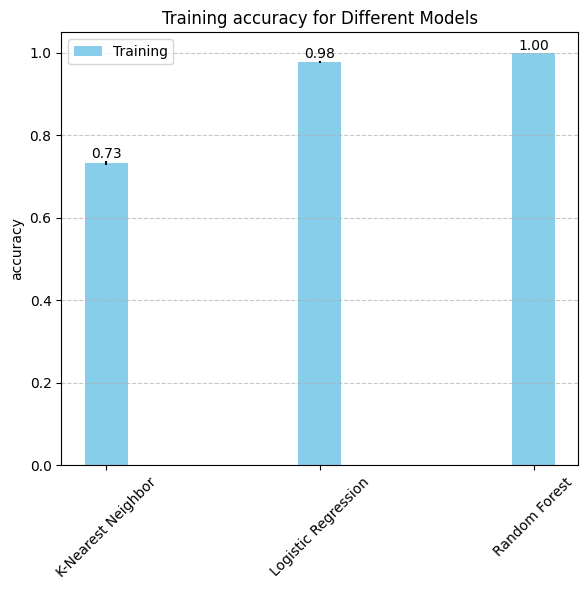

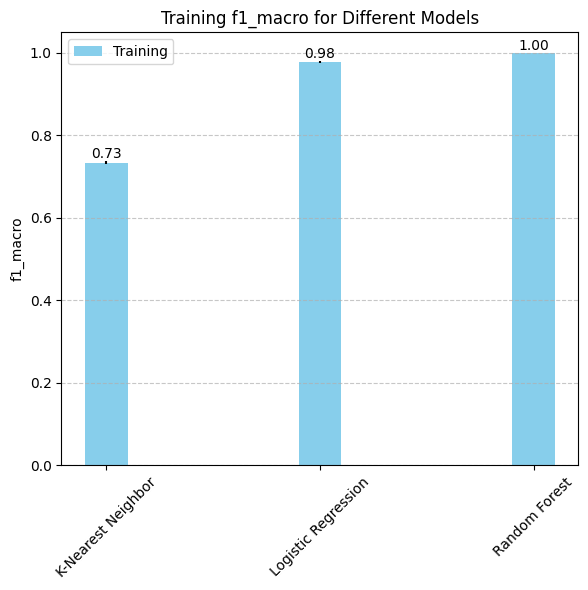

In [59]:
# Plotting training metrics
# Plotting training metrics
models = list(train_metrics.keys())
metrics = list(train_metrics[models[0]].keys())

# Plotting training metrics
for metric in metrics:
    train_means = [train_metrics[model][metric][0] for model in models]
    train_stds = [train_metrics[model][metric][1] for model in models]
    
    x = np.arange(len(models))
    width = 0.20

    fig, ax = plt.subplots(figsize=(6, 6))

    bars_train = ax.bar(x, train_means, width, yerr=train_stds, label='Training', color='skyblue')

    for i in range(len(models)):
        ax.text(x[i], train_means[i] + train_stds[i], f'{train_means[i]:.2f}', ha='center', va='bottom', fontsize=10)

    ax.set_ylabel(metric)
    ax.set_title(f'Training {metric} for Different Models')
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

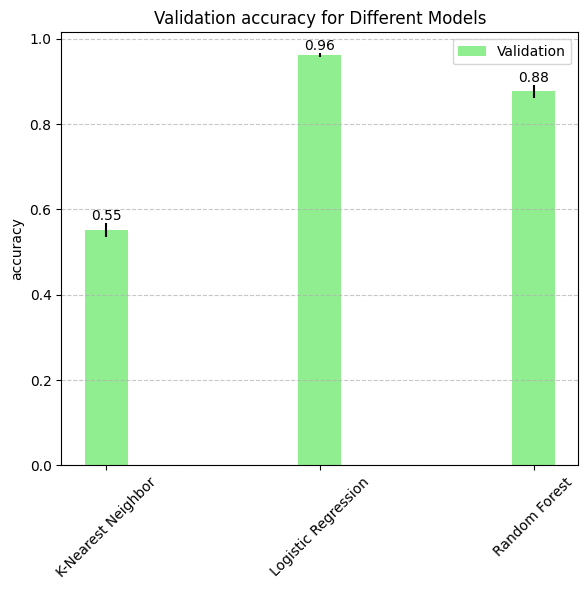

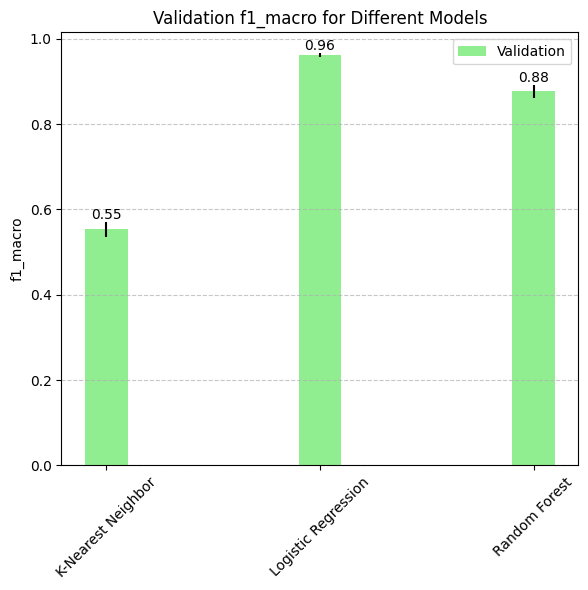

In [60]:
# Plotting validation metrics
for metric in metrics:
    val_means = [val_metrics[model][metric][0] for model in models]
    val_stds = [val_metrics[model][metric][1] for model in models]
    
    x = np.arange(len(models))
    width = 0.20

    fig, ax = plt.subplots(figsize=(6, 6))

    bars_val = ax.bar(x, val_means, width, yerr=val_stds, label='Validation', color='lightgreen')

    for i in range(len(models)):
        ax.text(x[i], val_means[i] + val_stds[i], f'{val_means[i]:.2f}', ha='center', va='bottom', fontsize=10)

    ax.set_ylabel(metric)
    ax.set_title(f'Validation {metric} for Different Models')
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [61]:
# training insights
# nearest neighbors model is underfitting the data, more neighbors should improve performance
# random forest model is good enough but it severly overfits the training data which will need careful regulrization
# logistic regression is the best model for this dataset
# we will now train the logistic regression on the whole dataset to squeeze every bit of performance!
from joblib import dump

model = Pipeline([('scaler',StandardScaler()),('lr',LogisticRegression(random_state=RS))])
X = train_df.drop("price_range",axis=1)
y = train_df["price_range"]
model.fit(X,y)
dump(model,"model.joblib")

['model.joblib']